In [247]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Read Dataset

In [248]:
data_train = pd.read_csv("kendaraan_train.csv")
data_train.head()

,id,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,1,Wanita,30.0,1.0,33.0,1.0,< 1 Tahun,Tidak,28029.0,152.0,97.0,0
1,2,Pria,48.0,1.0,39.0,0.0,> 2 Tahun,Pernah,25800.0,29.0,158.0,0
2,3,NaN,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,32733.0,160.0,119.0,0
3,4,Wanita,58.0,1.0,48.0,0.0,1-2 Tahun,Tidak,2630.0,124.0,63.0,0
4,5,Pria,50.0,1.0,35.0,0.0,> 2 Tahun,NaN,34857.0,88.0,194.0,0


In [249]:
data_train.describe()

,id,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
count,285831.000000,271617.000000,271427.000000,271525.000000,271602.000000,271262.000000,271532.000000,271839.000000,285831.000000
mean,142916.000000,38.844336,0.997848,26.405410,0.458778,30536.683472,112.021567,154.286302,0.122471
std,82512.446734,15.522487,0.046335,13.252714,0.498299,17155.000770,54.202457,83.694910,0.327830
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,71458.500000,25.000000,1.000000,15.000000,0.000000,24398.000000,29.000000,82.000000,0.000000
50%,142916.000000,36.000000,1.000000,28.000000,0.000000,31646.000000,132.000000,154.000000,0.000000
75%,214373.500000,49.000000,1.000000,35.000000,1.000000,39377.750000,152.000000,227.000000,0.000000
max,285831.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [250]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285831 entries, 0 to 285830
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 285831 non-null  int64  
 1   Jenis_Kelamin      271391 non-null  object 
 2   Umur               271617 non-null  float64
 3   SIM                271427 non-null  float64
 4   Kode_Daerah        271525 non-null  float64
 5   Sudah_Asuransi     271602 non-null  float64
 6   Umur_Kendaraan     271556 non-null  object 
 7   Kendaraan_Rusak    271643 non-null  object 
 8   Premi              271262 non-null  float64
 9   Kanal_Penjualan    271532 non-null  float64
 10  Lama_Berlangganan  271839 non-null  float64
 11  Tertarik           285831 non-null  int64  
dtypes: float64(7), int64(2), object(3)
memory usage: 26.2+ MB


# Pre-Processing

In [251]:
data_train.isnull().sum()

id                       0
Jenis_Kelamin        14440
Umur                 14214
SIM                  14404
Kode_Daerah          14306
Sudah_Asuransi       14229
Umur_Kendaraan       14275
Kendaraan_Rusak      14188
Premi                14569
Kanal_Penjualan      14299
Lama_Berlangganan    13992
Tertarik                 0
dtype: int64

In [252]:
data_train.drop('id', inplace=True, axis=1)
data_train.drop('Jenis_Kelamin', inplace =True, axis=1)
data_train.drop('Umur_Kendaraan', inplace =True, axis=1)
data_train.drop('Kendaraan_Rusak', inplace =True, axis=1)

In [253]:
umur_mean = data_train['Umur'].mean()
premi_mean = data_train['Premi'].mean()
berlangganan_mean = data_train['Lama_Berlangganan'].mean()
kanal_mean = data_train['Kanal_Penjualan'].mean()
data_train['Umur'].fillna(umur_mean, inplace=True)
data_train['Premi'].fillna(premi_mean, inplace=True)
data_train['Lama_Berlangganan'].fillna(berlangganan_mean, inplace=True)
data_train['Kanal_Penjualan'].fillna(kanal_mean, inplace=True)
data_train.ffill(inplace=True)
data_train.isnull().sum()

Umur                 0
SIM                  0
Kode_Daerah          0
Sudah_Asuransi       0
Premi                0
Kanal_Penjualan      0
Lama_Berlangganan    0
Tertarik             0
dtype: int64

In [254]:
data_train.describe()

,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
count,285831.000000,285831.000000,285831.000000,285831.000000,285831.000000,285831.000000,285831.000000,285831.000000
mean,38.844336,0.997792,26.396808,0.458474,30536.683472,112.021567,154.286302,0.122471
std,15.131608,0.046933,13.255625,0.498273,16712.080405,52.829291,81.620684,0.327830
min,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,25.000000,1.000000,15.000000,0.000000,24929.000000,55.000000,85.000000,0.000000
50%,38.000000,1.000000,28.000000,0.000000,30949.000000,124.000000,154.286302,0.000000
75%,49.000000,1.000000,35.000000,1.000000,38845.000000,152.000000,223.000000,0.000000
max,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [255]:
data_train = (data_train - data_train.min()) / (data_train.max() - data_train.min())
data_train.describe()

,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
count,285831.000000,285831.000000,285831.000000,285831.000000,285831.000000,285831.000000,285831.000000,285831.000000
mean,0.289913,0.997792,0.507631,0.458474,0.051916,0.685318,0.499261,0.122471
std,0.232794,0.046933,0.254916,0.498273,0.031090,0.326107,0.282425,0.327830
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.076923,1.000000,0.288462,0.000000,0.041484,0.333333,0.259516,0.000000
50%,0.276923,1.000000,0.538462,0.000000,0.052683,0.759259,0.499261,0.000000
75%,0.446154,1.000000,0.673077,1.000000,0.067372,0.932099,0.737024,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Data Visualization

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Umur', ylabel='Density'>

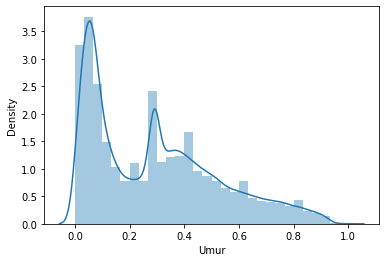

In [256]:
sns.distplot(data_train['Umur'], bins=30)

Text(0.5, 1.0, 'Scatter plot between Premi and Lama_Berlangganan')

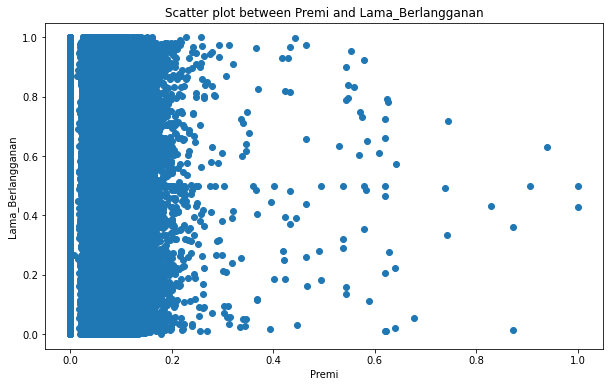

In [257]:
plt.figure(figsize=(10,6))
plt.scatter(data_train['Premi'],data_train['Lama_Berlangganan'], marker='o');
plt.xlabel('Premi')
plt.ylabel('Lama_Berlangganan')
plt.title('Scatter plot between Premi and Lama_Berlangganan')

Text(0.5, 1.0, 'Scatter plot between Age and Premi')

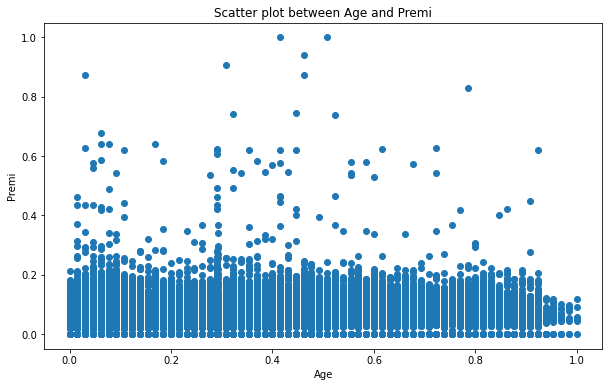

In [258]:
plt.figure(figsize=(10,6))
plt.scatter(data_train['Umur'],data_train['Premi'], marker='o');
plt.xlabel('Age')
plt.ylabel('Premi')
plt.title('Scatter plot between Age and Premi')

Text(0.5, 1.0, 'Scatter plot between Age and Kanal_Penjualan')

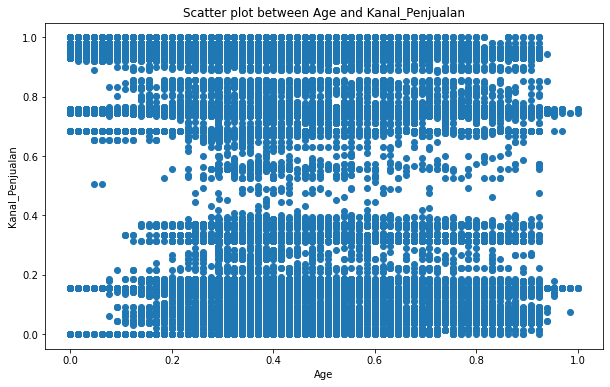

In [259]:
plt.figure(figsize=(10,6))
plt.scatter(data_train['Umur'],data_train['Kanal_Penjualan'], marker='o');
plt.xlabel('Age')
plt.ylabel('Kanal_Penjualan')
plt.title('Scatter plot between Age and Kanal_Penjualan')

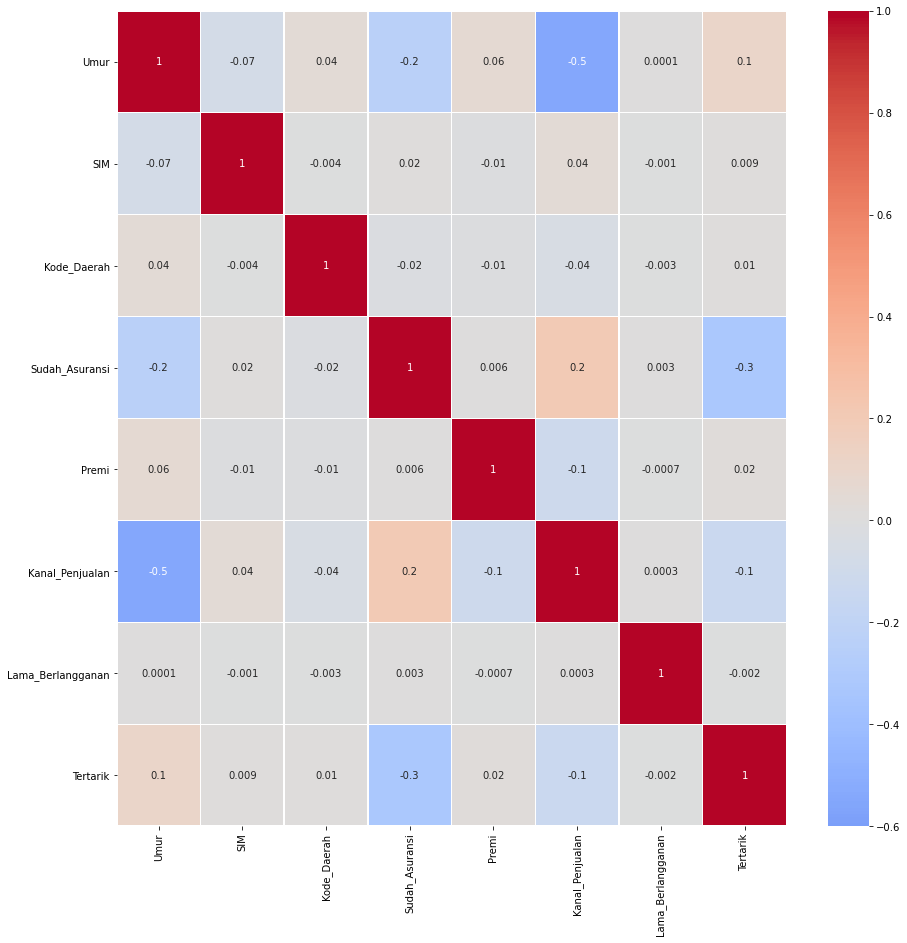

In [260]:
corr_mat = data_train.corr()
fig, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(corr_mat, annot=True, ax=ax,
            fmt='.1g', cmap='coolwarm', linewidths=.5,
            vmin=-0.6, vmax=1, center= 0)
plt.show()

In [261]:
data_train.to_csv('kendaraan_diolah.csv')

In [262]:
cluster_df = data_train[['Umur','Kanal_Penjualan']].copy(deep=True) 
cluster_df.sort_values(by=['Umur','Kanal_Penjualan'], inplace=True)
cluster_arr = np.array(cluster_df)

In [263]:
def count_distance(x1, x2):
    return (sum((x1 - x2) ** 2)) ** 2 

In [264]:
def define_clusters(centroids, cluster_arr):
    clusters = []
    for i in range(cluster_arr.shape[0]): 
        distances = []
        for centroid in centroids:
            distances.append(count_distance(centroid, cluster_arr[i])) 
        cluster = [x for x, val in enumerate(distances) if val == min(distances)] 
        clusters.append(cluster[0]) 
        
    return np.array(clusters)

In [265]:
def count_centroids(clusters, cluster_arr):
    new_centroids = []
    cluster_df = pd.concat([pd.DataFrame(cluster_arr), pd.DataFrame(clusters, columns=['cluster'])], axis=1) 
    for c in set(cluster_df['cluster']):
        current_cluster = cluster_df[cluster_df['cluster']==c][cluster_df.columns[:-1]]
        cluster_mean = current_cluster.mean(axis=0) 
        new_centroids.append(cluster_mean) 
    return np.array(new_centroids)

# Main Program

In [266]:
k = 3
centroids = [cluster_arr[i+2] for i in range(k)] 
clusters = define_clusters(centroids, cluster_arr)
initial_clusters = clusters
for i in range(20): 
    centroids = count_centroids(clusters, cluster_arr)
    clusters = define_clusters(centroids, cluster_arr)

Text(0, 0.5, 'Kanal_Penjualan')

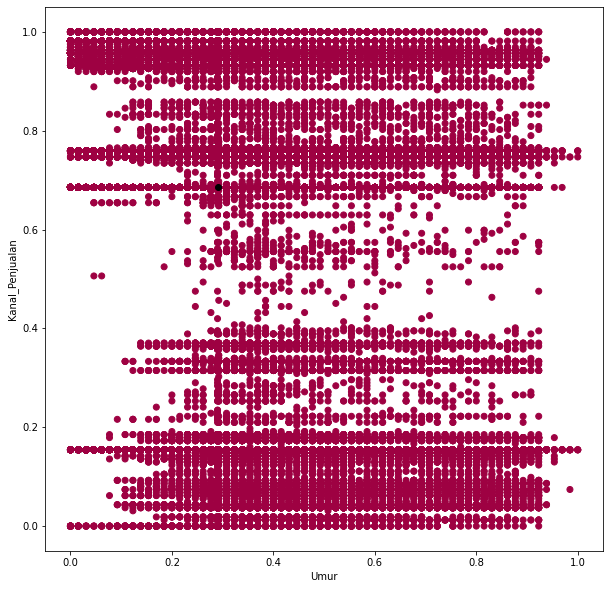

In [306]:
plt.subplots(figsize=(10,10))
plt.scatter(x=cluster_arr[:,0], y=cluster_arr[:,1], c=clusters, cmap=plt.cm.Spectral)
plt.scatter(x=centroids[:,0], y=centroids[:,1], color='black')
plt.xlabel('Umur')
plt.ylabel('Kanal_Penjualan')

# Evaluation

In [268]:
print(centroids)

[[0.28991286 0.68531831]]


In [269]:
print(cluster_arr)

[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.         0.75925926]
 [1.         0.75925926]
 [1.         0.75925926]]


In [279]:
def calculate_cost(X, centroids, cluster):
  sum = 0
  for i, val in enumerate(X):
    sum += np.sqrt((centroids[int(cluster[i]), 0]-val[0])**2 +(centroids[int(cluster[i]), 1]-val[1])**2)
  return sum

In [290]:
cost_list = []
# for k in range(1, 10):
#     centroids, cluster = kmeans(X, k)
#     WCSS (Within cluster sum of square)
#     cost = calculate_cost(cluster_arr, centroids, clusters)
#     cost_list.append(cost)
for k in range(1,10):
    cost = calculate_cost(cluster_arr, centroids, clusters)
    cost_list.append(cost)
print(cost_list)

[103369.26392102103, 103369.26392102103, 103369.26392102103, 103369.26392102103, 103369.26392102103, 103369.26392102103, 103369.26392102103, 103369.26392102103, 103369.26392102103]


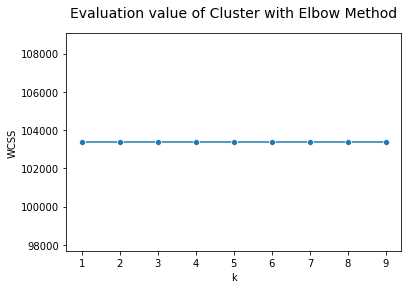

In [291]:
sns.lineplot(x=range(1,10), y=cost_list, marker='o')
plt.xlabel('k')
plt.ylabel('WCSS')
plt.title('Evaluation value of Cluster with Elbow Method', fontsize=14, pad=16)
plt.show()

# Evaluation using library

In [311]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
distortions = []
inertias = []
K = range(1, 6) #menentukan range K yang akan diuji
X = cluster_arr
 
for k in K:
    kmean_model = KMeans(n_clusters=k).fit(X)
    kmean_model.fit(X)
    inertias.append(kmean_model.inertia_)

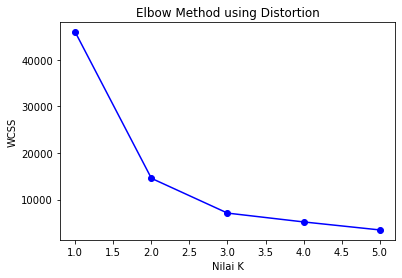

In [312]:
plt.plot(K, inertias, 'bo-')
plt.xlabel('Nilai K')
plt.ylabel('WCSS')
plt.title('Elbow Method using Distortion')
plt.show()